In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 12

In [3]:
df = pd.read_csv("desafio_indicium_imdb.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [5]:
df["Runtime"] = df["Runtime"].str.replace(" min", "").astype(int)
df["Gross"] = df["Gross"].str.replace(",","").astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    float64
dtypes: float64(3), int64(3), object(10)
memory usage: 125.0+ KB


In [7]:
print(df.isnull().sum())

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


---

# **Tratamento da coluna "Certificate

In [8]:
df['Certificate'].fillna('Not Rated', inplace=True)

/tmp/ipython-input-1412793593.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certificate'].fillna('Not Rated', inplace=True)


---
# **Tratamento da coluna "Meta_score"**

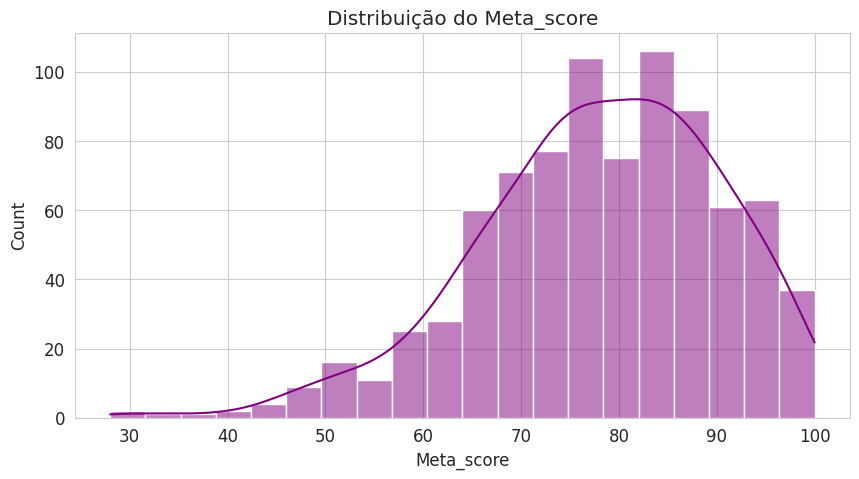

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Meta_score'].dropna(), kde=True, color='purple')
plt.title('Distribui√ß√£o do Meta_score')
plt.show()

In [10]:
meta_mean = df['Meta_score'].mean()
meta_median = df['Meta_score'].median()
print(f"M√©dia do Meta_score: {meta_mean:.2f}")
print(f"Mediana do Meta_score: {meta_median:.2f}")

M√©dia do Meta_score: 77.97
Mediana do Meta_score: 79.00


In [11]:
df['Meta_score'].fillna(meta_median, inplace=True)

/tmp/ipython-input-116203160.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Meta_score'].fillna(meta_median, inplace=True)


---

# **Tratamento da coluna "Meta_score"**

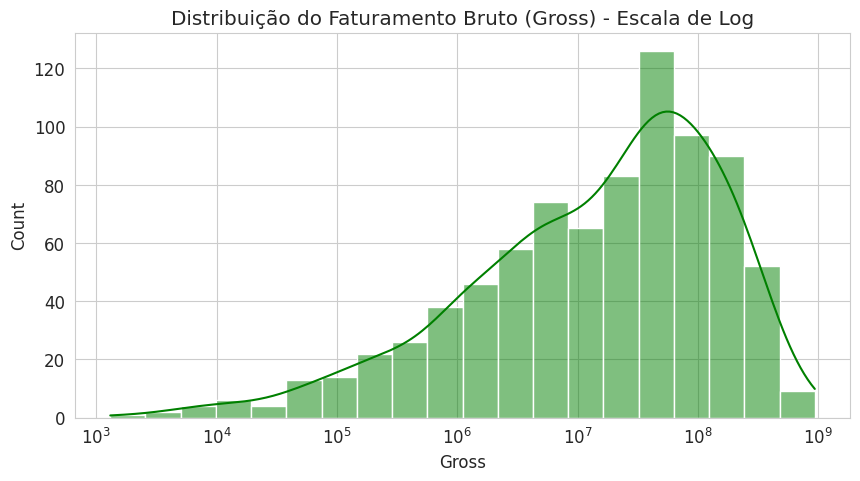

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Gross'].dropna(), kde=True, color='green', log_scale=True)
plt.title('Distribui√ß√£o do Faturamento Bruto (Gross) - Escala de Log')
plt.show()

In [13]:
gross_mean = df['Gross'].mean()
gross_median = df['Gross'].median()
print(f"M√©dia do Faturamento: ${gross_mean:,.2f}")
print(f"Mediana do Faturamento: ${gross_median:,.2f}")

M√©dia do Faturamento: $68,082,574.10
Mediana do Faturamento: $23,457,439.50


In [14]:
df['Gross'].fillna(gross_median, inplace=True)

/tmp/ipython-input-3160985083.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gross'].fillna(gross_median, inplace=True)


In [15]:
print(df.isnull().sum())

Unnamed: 0       0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    999 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     999 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          999 non-null    float64
dtypes: float64(3), int64(3), object(10)
memory usage: 125.0+ KB


---

# **Tratando coluna "Released_Year"**

In [17]:
df.loc[df['Series_Title'] == 'Apollo 13', 'Released_Year'] = 1995

In [18]:
df['Released_Year'] = df['Released_Year'].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    int64  
 3   Certificate    999 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     999 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          999 non-null    float64
dtypes: float64(3), int64(4), object(9)
memory usage: 125.0+ KB


---

# **1. An√°lise Explorat√≥ria**

**An√°lise de faturamento por g√™nero**


**L√≠deres de Bilheteria:** G√™neros como Aventura, Sci-Fi e A√ß√£o dominam o topo da lista, apresentando o maior faturamento mediano. Isso confirma que filmes de grande espet√°culo visual s√£o os principais motores da ind√∫stria cinematogr√°fica em termos de receita.

In [20]:
df_genres = df.copy()
df_genres['Genre'] = df_genres['Genre'].str.split(', ')
df_exploded = df_genres.explode('Genre')

In [21]:
median_gross_by_genre = df_exploded.groupby('Genre')['Gross'].median().sort_values(ascending=False)

/tmp/ipython-input-1943182047.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_exploded, x='Gross', y='Genre', order=median_gross_by_genre.index, palette='magma_r', showfliers=False)


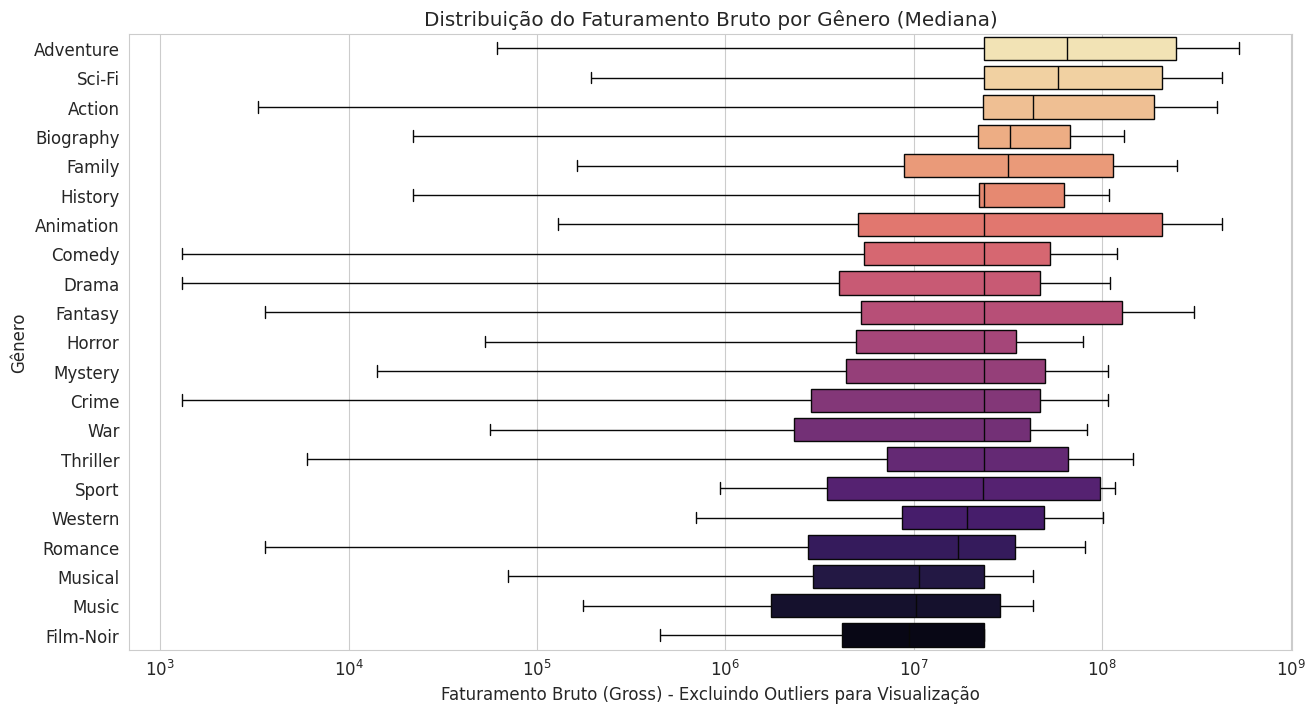

In [22]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_exploded, x='Gross', y='Genre', order=median_gross_by_genre.index, palette='magma_r', showfliers=False)
plt.title('Distribui√ß√£o do Faturamento Bruto por G√™nero (Mediana)')
plt.xlabel('Faturamento Bruto (Gross) - Excluindo Outliers para Visualiza√ß√£o')
plt.ylabel('G√™nero')
plt.xscale('log') # Escala de log √© √≥tima para dados de faturamento
plt.show()

In [23]:
print("Top 5 G√™neros por Faturamento Mediano:")
print(median_gross_by_genre.head())

Top 5 G√™neros por Faturamento Mediano:
Genre
Adventure    64898511.0
Sci-Fi       57938693.0
Action       43000000.0
Biography    32572577.0
Family       31637200.0
Name: Gross, dtype: float64


---

**An√°lise Temporal**

**Dura√ß√£o M√©dia (Runtime):** H√° uma tend√™ncia de aumento na dura√ß√£o dos filmes a partir dos anos 1990. Isso pode significar uma maior disposi√ß√£o do p√∫blico para narrativas mais longas e complexas, ou uma tend√™ncia dos diretores em criar filmes mais imersivos.

**Faturamento e Votos (Gross, No_of_Votes):** Essas m√©tricas explodem a partir dos anos 60. Isso n√£o significa necessariamente que os filmes mais novos s√£o "melhores", mas sim o crescimento do mercado de cinema global e, principalmente, a ascens√£o da internet, que tornou a vota√ß√£o e o engajamento do p√∫blico massivos e instant√¢neos.

**Nota M√©dia (IMDB_Rating):** A nota m√©dia parece ter picos em certas "eras de ouro", como os anos 1950 e 2010. Isso pode indicar per√≠odos de grande inova√ß√£o no cinema.

In [24]:
df['Decade'] = (df['Released_Year'].astype(int) // 10) * 10

In [25]:
decade_analysis = df.groupby('Decade').agg({
    'IMDB_Rating': 'mean',
    'Runtime': 'mean',
    'Gross': 'mean',
    'No_of_Votes': 'mean'
}).reset_index()

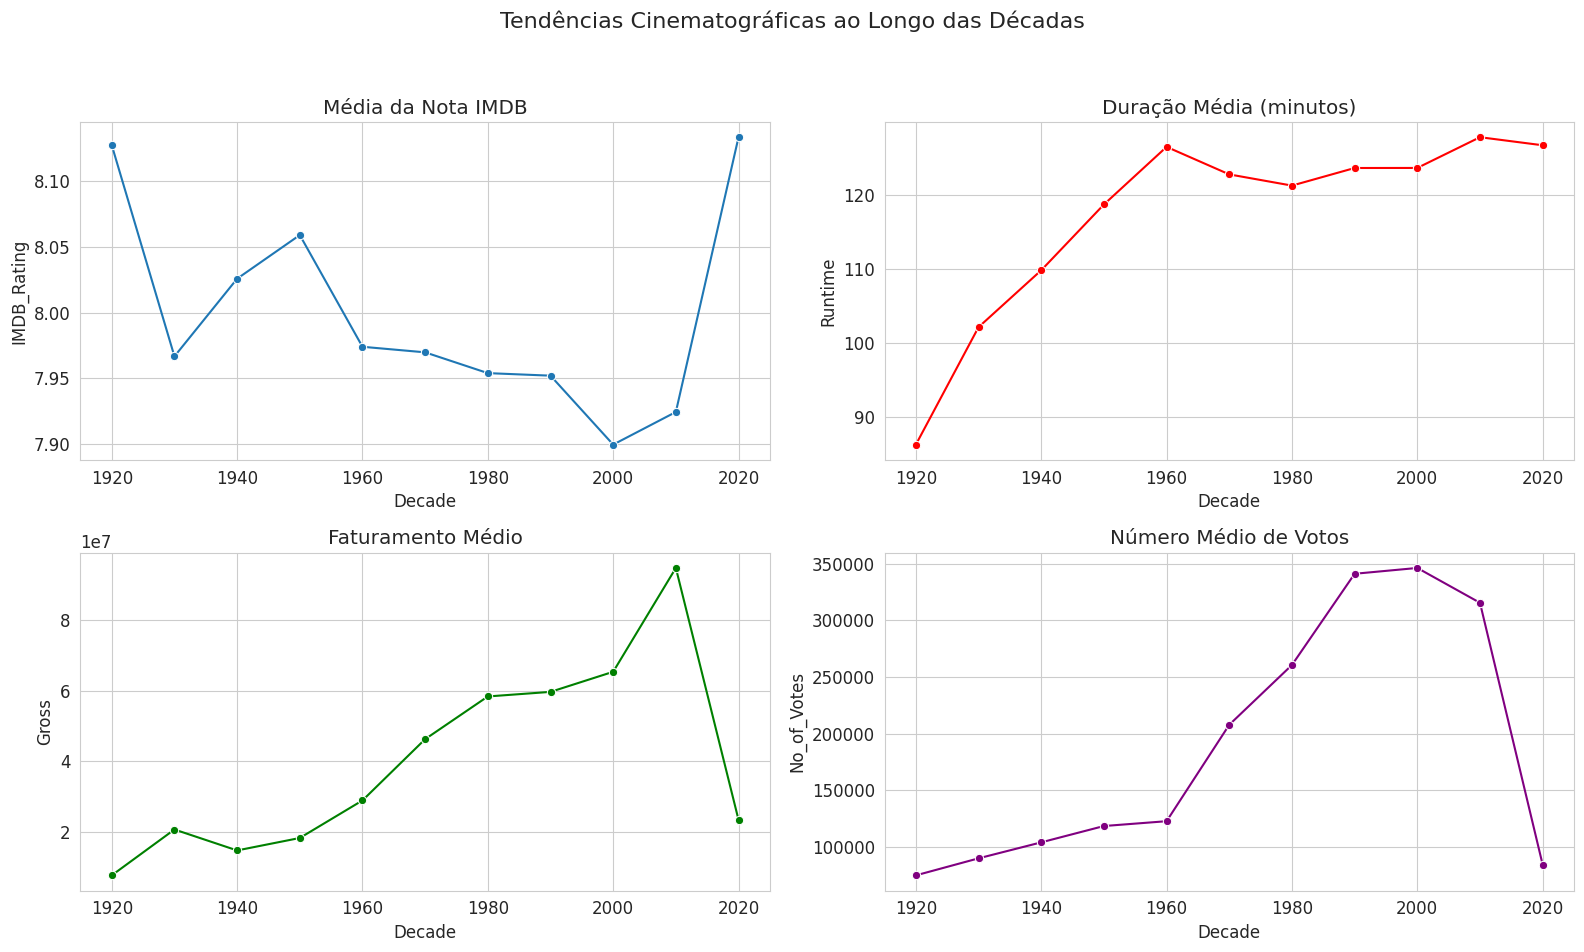

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Tend√™ncias Cinematogr√°ficas ao Longo das D√©cadas', fontsize=16)

sns.lineplot(ax=axes[0, 0], data=decade_analysis, x='Decade', y='IMDB_Rating', marker='o')
axes[0, 0].set_title('M√©dia da Nota IMDB')

sns.lineplot(ax=axes[0, 1], data=decade_analysis, x='Decade', y='Runtime', marker='o', color='red')
axes[0, 1].set_title('Dura√ß√£o M√©dia (minutos)')

sns.lineplot(ax=axes[1, 0], data=decade_analysis, x='Decade', y='Gross', marker='o', color='green')
axes[1, 0].set_title('Faturamento M√©dio')

sns.lineplot(ax=axes[1, 1], data=decade_analysis, x='Decade', y='No_of_Votes', marker='o', color='purple')
axes[1, 1].set_title('N√∫mero M√©dio de Votos')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

---

# **2. Perguntas**

---

**a. Qual filme voc√™ recomendaria para uma pessoa que voc√™ n√£o conhece?**
- Recomendaria um filme com a maior probabilidade de agradar essa pessoa. Ou seja, um filme que tenha uma alta avalia√ß√£o do p√∫blico, alto n√∫mero de votos.
- Ou recomendaria os melhores filmes de cada g√™nero.

In [48]:
recommendation = df.sort_values(by=['IMDB_Rating', 'No_of_Votes'], ascending=[False, False]).iloc[0]

In [49]:
print("O filme recomendado:")
print(f"T√≠tulo: {recommendation['Series_Title']} ({recommendation['Released_Year']})")
print(f"G√™nero: {recommendation['Genre']}")

print(f"Nota IMDB: {recommendation['IMDB_Rating']} de 10 (a mais alta do dataset).")
print(f"N√∫mero de Votos: {int(recommendation['No_of_Votes']):,} (uma das maiores vota√ß√µes.")

O filme recomendado:
T√≠tulo: The Godfather (1972)
G√™nero: Crime, Drama
Nota IMDB: 9.2 de 10 (a mais alta do dataset).
N√∫mero de Votos: 1,620,367 (uma das maiores vota√ß√µes.


In [27]:
def get_top_movie_for_genre(genre_name, dataframe):
    genre_df = dataframe[dataframe['Genre'] == genre_name]

    top_movie = genre_df.sort_values(by=['IMDB_Rating', 'No_of_Votes'], ascending=[False, False]).iloc[0]

    return top_movie

In [29]:
genres_to_recommend = ['Drama', 'Action', 'Sci-Fi', 'Crime', "Romance", "Crime", "Music", "Animation", "Biography", "Family"]

In [34]:
for genre in genres_to_recommend:
    movie = get_top_movie_for_genre(genre, df_exploded)

    print(f"üé¨ Para quem gosta de '{genre}':")
    print(f"   - T√≠tulo: {movie['Series_Title']} ({int(movie['Released_Year'])})")
    print(f"   - Nota IMDB: {movie['IMDB_Rating']}/10.0")
    print(f"   - Sinopse: {movie['Overview']}")
    print("-" * 40)

üé¨ Para quem gosta de 'Drama':
   - T√≠tulo: The Godfather (1972)
   - Nota IMDB: 9.2/10.0
   - Sinopse: An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.
----------------------------------------
üé¨ Para quem gosta de 'Action':
   - T√≠tulo: The Dark Knight (2008)
   - Nota IMDB: 9.0/10.0
   - Sinopse: When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.
----------------------------------------
üé¨ Para quem gosta de 'Sci-Fi':
   - T√≠tulo: Inception (2010)
   - Nota IMDB: 8.8/10.0
   - Sinopse: A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O.
----------------------------------------
üé¨ Para quem gosta de 'Crime':
   - T√≠tulo: The Godfather (1972)
   - Nota IMDB: 9.2/10.0
   - Sino

---

b. **Quais s√£o os principais fatores que est√£o relacionados com alta expectativa de faturamento de um filme?**
- N√∫mero de votos ("No_of_Votes")
- Ano de lan√ßamento ("Released_Year")
- Avalia√ß√£o do IMDB ("IMDB_Rating)

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [51]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [52]:
features = ['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', ]
target = 'Gross'

X = df[features]
y = df[target]

In [53]:
rf_model = RandomForestRegressor(random_state=42)

In [56]:
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

In [57]:
random_search.fit(X, y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [58]:
print("Melhores par√¢metros encontrados:")
print(random_search.best_params_)

Melhores par√¢metros encontrados:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}


In [59]:
best_score_rmse = np.sqrt(-random_search.best_score_)
print(f"\nMelhor performance m√©dia (RMSE) com valida√ß√£o cruzada: ${best_score_rmse:,.2f}")


Melhor performance m√©dia (RMSE) com valida√ß√£o cruzada: $78,538,371.31


In [60]:
final_model = RandomForestRegressor(**random_search.best_params_, random_state=42)

In [62]:
final_model.fit(X, y)

RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=4,
                      random_state=42)

In [63]:
feature_importances = pd.Series(final_model.feature_importances_, index=features).sort_values(ascending=False)

/tmp/ipython-input-2238824018.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='inferno')


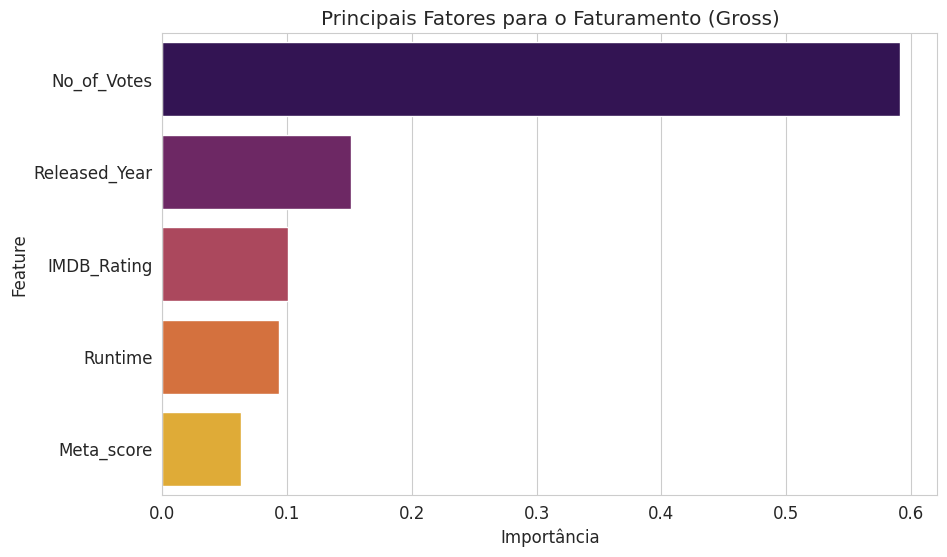

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='inferno')
plt.title('Principais Fatores para o Faturamento (Gross)')
plt.xlabel('Import√¢ncia')
plt.ylabel('Feature')
plt.show()

---

c. **Quais insights podem ser tirados com a coluna Overview? √â poss√≠vel inferir o g√™nero do filme a partir dessa coluna?**
- Sim, √© poss√≠vel. Com a coluna Overview, podemos fazer uma nuvem de palavras com os termos mais frequentes de cada g√™nero

In [ ]:
from wordcloud import WordCloud

In [ ]:
genre = "Music"
sci_fi_text = " ".join(overview for overview in df_exploded[df_exploded['Genre'] == genre]['Overview'])

In [ ]:
wordcloud = WordCloud(background_color="black", collocations=False, width=800, height=400).generate(sci_fi_text)

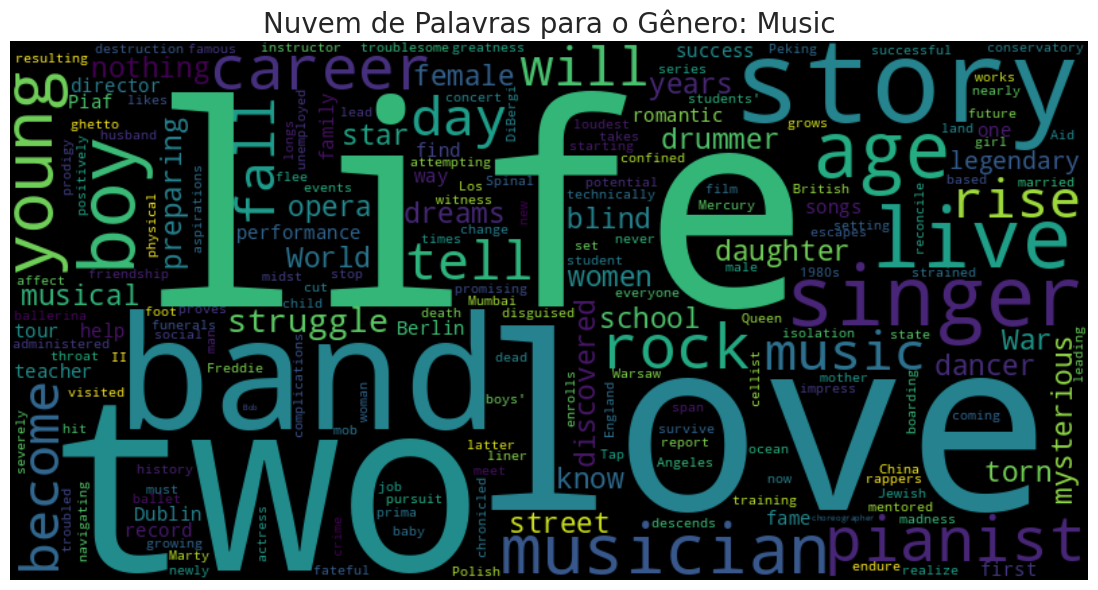

In [ ]:
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"Nuvem de Palavras para o G√™nero: {genre}", fontsize=20)
plt.show()



---


# **3. Perguntas Nota IMDB**
**a. Explique como voc√™ faria a previs√£o da nota do imdb a partir dos dados.**
- Primeiramente, eu prepararia e limparia os dados, verificando a existencia de dados nulos e transformando algumas colunas para n√∫meros
- Definiria as colunas que seriam usadas como as "Features" e o "Target"
- Separaria os dados em dados de teste e treinamento
- Treinaria o modelo usando algum algoritmo de machine learning
- Realizaria a predi√ß√£o usando o modelo treinado
- Caso necess√°rio, faria mudan√ßa em alguns hiperparametros para melhorar a performace do modelo

b. **Quais vari√°veis e/ou suas transforma√ß√µes voc√™ utilizou e por qu√™?**
- Utilizei como variavel: Runtime, Meta_score, No_of_Votes, Gross, Movie_age, Main_Genre e Director
- Fiz transforma√ß√µes em Runtime e Gross, removendo os textos contidos neste dado e converti para n√∫mero, pois modelos matematicos n√£o conseguem textos misturados s√≥ numeros.
- Criei o Movie_age, porque √© uma feature mais intuitiva do que Realease_Year
- Crei o Main_Genre para dar uma simplificada para o modelo e deixar mais direta e facil dele aprender
- Utilizei a t√©cnica One-Hot Enconding em Main_Genre e Director, pois o modelo n√£o entende texto, ent√£o essa t√©cnica converte cada categoria para valores n√∫mericos

**c. Qual tipo de problema estamos resolvendo (regress√£o, classifica√ß√£o)?**
- Estamos resolvendo um problema de regress√£o, pois prever o IMDB_Rating √© um valor n√∫merico e cont√≠nuo, logo, √© um problema de regress√£o.

**d. Qual modelo melhor se aproxima dos dados e quais seus pr√≥s e contras?**-
- Utilizei o modelo XGBoost Regressor, pois √© um modelo bom para trabalhar com dados tabulares.

**e. Qual medida de performance do modelo foi escolhida e por qu√™?**
- Utilizei o RMSE, pois o resultado est√° na mesma unidade da nota do IMDB, o RMSE diz, em m√©dia, quantos pontos o modelo erra em suas previs√µes. Ex: 0.1 significa que o modelo esta errando na m√©dia de 0.1 pontos.
- O RMSE penaliza os maiores erros, ou seja, caso haja um erro muito grande, ele ser√° penalizado muito mais que um erro pequeno. Ele faz isso calculando a diferen√ßa entre as previs√µes e os valores reais e elevando ao quadrado.




---


# **4. Previs√£o Nota IMDB**
- A previs√£o da nota para o novo filme √© 8.96.
- Primeiramente, foi feito um treinamento no modelo sem a utiliza√ß√£o da biblioteca SHAP, por√©m, utilizei a biblioteca e percebi que o modelo estava com o problema de Overfitting por Alta Cardinaliade. A coluna "Director" tinha muitos valores √∫nicos (v√°rios diretores diferentes). Ao aplicar o One-Hot Encoding, foi criado centenas de novas colunas para cada diretor. Como muitos diretores s√≥ tinham 1 filme, o modelo memorizou: "Se uma coluna de direto √© 1, a nota √© X", ou seja, isso causaria problemas com um novo filme de um diretor que ele nunca tinha visto antes.

# **Solu√ß√£o**
- Identifiquei os diretores que mais apareciam, manti as colunas individuais deles e agrupei os outros diretores que apareciam menos em outra categoria.
- Isso faz o modelo aprender padr√µes mais gerais, pois reduzi bastante o n√∫mero de colunas.

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [66]:
current_year = 2025
df['Movie_Age'] = current_year - df['Released_Year']


In [67]:
df['Main_Genre'] = df['Genre'].apply(lambda x: x.split(',')[0])

In [68]:
numerical_features = ['Runtime', 'Meta_score', 'No_of_Votes', 'Gross', 'Movie_Age']
categorical_features = ['Main_Genre', 'Director']

features = numerical_features + categorical_features
target = 'IMDB_Rating'

In [69]:
X = df[numerical_features + categorical_features]
y = df['IMDB_Rating']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [72]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42))
])

In [75]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Runtime', 'Meta_score',
                                                   'No_of_Votes', 'Gross',
                                                   'Movie_Age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Main_Genre',
                                                   'Director'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytr...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [78]:
predictions = model_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"A performance quantitativa do modelo (RMSE): {rmse:.4f}")

A performance quantitativa do modelo (RMSE): 0.1906


In [79]:
import shap

In [83]:
X_test_transformed = model_pipeline.named_steps['preprocessor'].transform(X_test)
feature_names_transformed = numerical_features + \
    model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()

X_test_transformed_df = pd.DataFrame(X_test_transformed.toarray(), columns=feature_names_transformed)

In [84]:
explainer = shap.TreeExplainer(model_pipeline.named_steps['regressor'])
shap_values = explainer.shap_values(X_test_transformed_df)

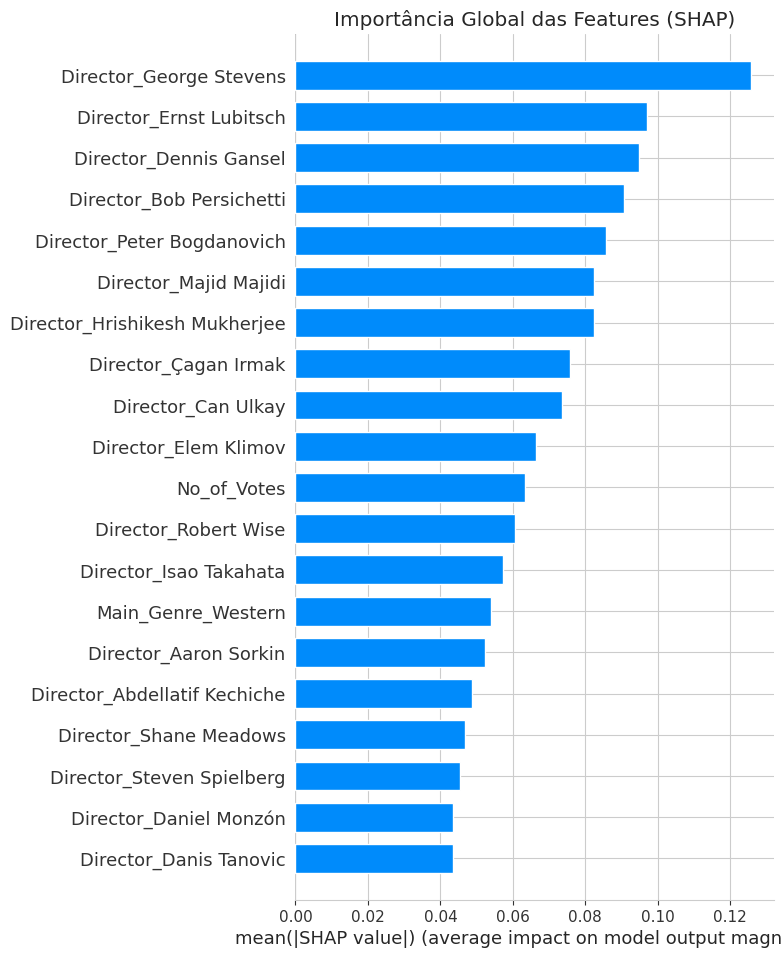

In [86]:
shap.summary_plot(shap_values, X_test_transformed_df, plot_type="bar", show=False)
plt.title("Import√¢ncia Global das Features (SHAP)")
plt.show()

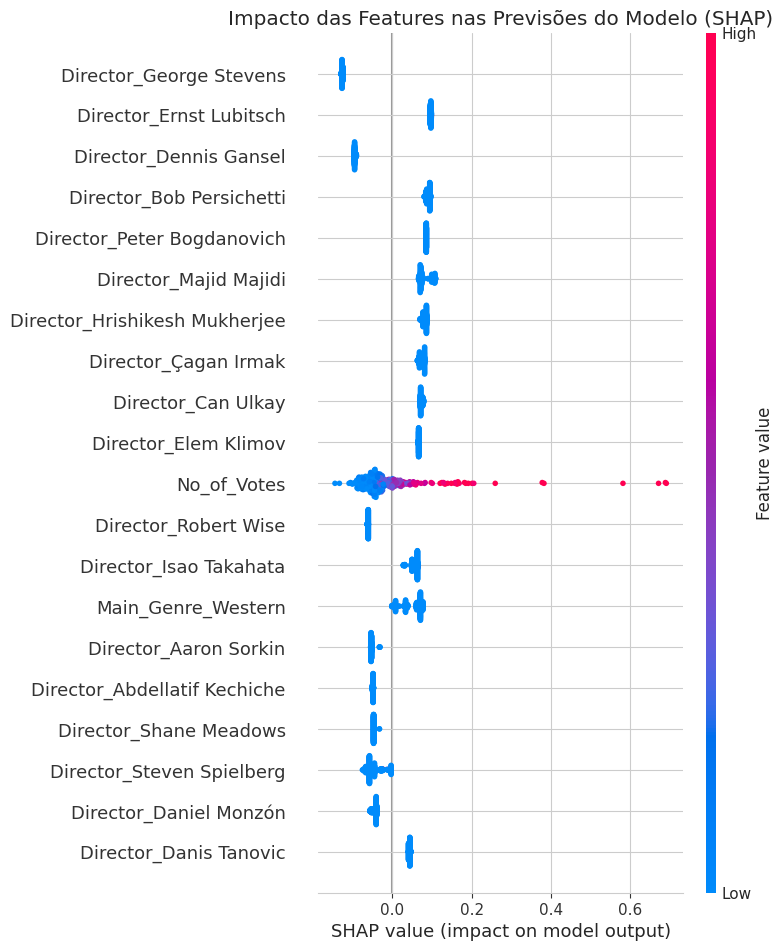

In [89]:
shap.summary_plot(shap_values, X_test_transformed_df, show=False)
plt.title("Impacto das Features nas Previs√µes do Modelo (SHAP)")
plt.show()

In [90]:
top_directors = df['Director'].value_counts().nlargest(15).index

In [91]:
df['Director_simplified'] = df['Director'].apply(lambda x: x if x in top_directors else 'Other')

In [92]:
print("Diretores que ser√£o tratados como categorias individuais:")
print(top_directors.tolist())

Diretores que ser√£o tratados como categorias individuais:
['Alfred Hitchcock', 'Steven Spielberg', 'Hayao Miyazaki', 'Martin Scorsese', 'Akira Kurosawa', 'Billy Wilder', 'Stanley Kubrick', 'Woody Allen', 'Clint Eastwood', 'David Fincher', 'Quentin Tarantino', 'Christopher Nolan', 'Howard Hawks', 'Ingmar Bergman', 'Rob Reiner']


In [93]:
categorical_features = ['Main_Genre', 'Director_simplified']

In [94]:
X = df[numerical_features + categorical_features]
y = df['IMDB_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42))
])

model_pipeline.fit(X_train, y_train)

predictions = model_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"A performance quantitativa do modelo (RMSE): {rmse:.4f}")

A performance quantitativa do modelo (RMSE): 0.2048


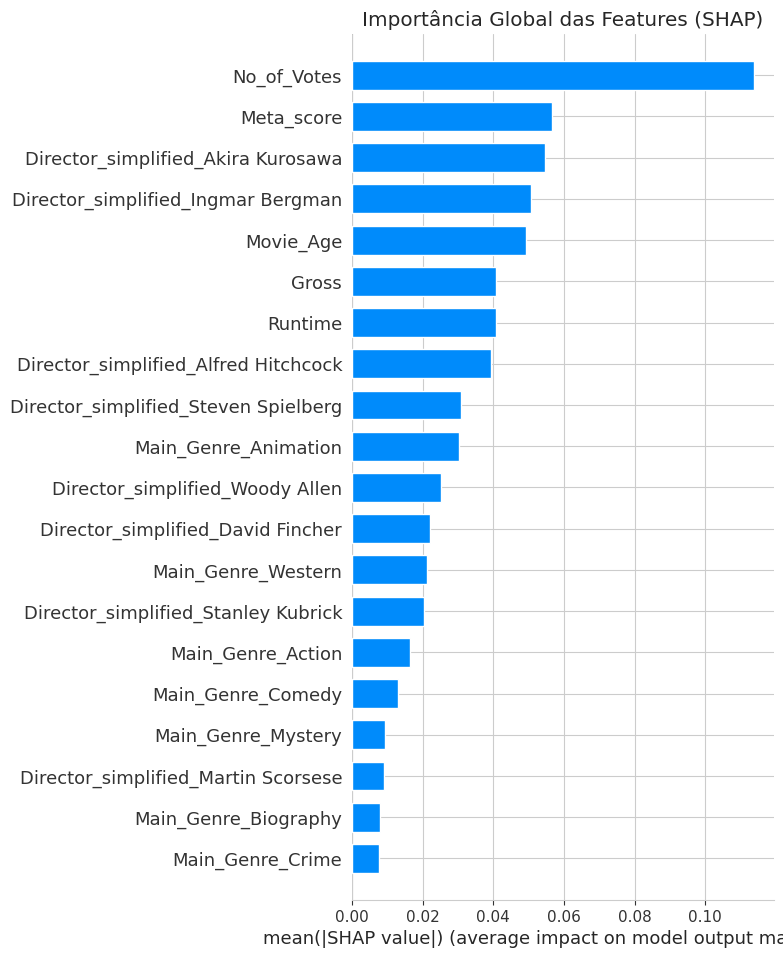

In [95]:
X_test_transformed = model_pipeline.named_steps['preprocessor'].transform(X_test)
feature_names_transformed = numerical_features + \
    model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()

X_test_transformed_df = pd.DataFrame(X_test_transformed.toarray(), columns=feature_names_transformed)

explainer = shap.TreeExplainer(model_pipeline.named_steps['regressor'])
shap_values = explainer.shap_values(X_test_transformed_df)

shap.summary_plot(shap_values, X_test_transformed_df, plot_type="bar", show=False)
plt.title("Import√¢ncia Global das Features (SHAP)")
plt.show()

In [96]:
shap.summary_plot(shap_values, X_test_transformed_df, show=False)
plt.title("Impacto das Features nas Previs√µes do Modelo (SHAP)")
plt.show()

In [97]:
new_movie_data = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

In [98]:
new_movie_df = pd.DataFrame([new_movie_data])

In [99]:
new_movie_df.head()

Series_Title Released_Year Certificate  Runtime  Genre  \
0  The Shawshank Redemption          1994           A  142 min  Drama   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   

         Director        Star1           Star2       Star3           Star4  \
0  Frank Darabont  Tim Robbins  Morgan Freeman  Bob Gunton  William Sadler   

   No_of_Votes       Gross  
0      2343110  28,341,469

In [100]:
new_movie_df['Runtime'] = new_movie_df['Runtime'].str.replace(' min', '').astype(int)
new_movie_df['Gross'] = new_movie_df['Gross'].str.replace(',', '').astype(float)
new_movie_df['Released_Year'] = new_movie_df['Released_Year'].astype(int)
new_movie_df['Movie_Age'] = current_year - new_movie_df['Released_Year']
new_movie_df['Main_Genre'] = new_movie_df['Genre'].apply(lambda x: x.split(',')[0])

In [101]:
new_movie_df[features].head()

Runtime  Meta_score  No_of_Votes       Gross  Movie_Age Main_Genre  \
0      142        80.0      2343110  28341469.0         31      Drama   

         Director  
0  Frank Darabont

In [103]:
top_directors = df['Director'].value_counts().nlargest(15).index
new_movie_df['Director_simplified'] = new_movie_df['Director'].apply(lambda x: x if x in top_directors else 'Other')

predicted_rating = model_pipeline.predict(new_movie_df)
final_prediction = predicted_rating[0]

In [104]:
print(f"A nota IMDB PREVISTA para 'The Shawshank Redemption' √©:")
print(f" >> {final_prediction:.2f} << ")

A nota IMDB PREVISTA para 'The Shawshank Redemption' √©:
 >> 8.96 << 




---

# **Salvando o modelo**

In [106]:
import pickle

In [107]:
filename = 'imdb_rating_predictor.pkl'

In [108]:
with open(filename, 'wb') as file:
    pickle.dump(model_pipeline, file)